In [86]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import astropy.units as u

import plasmapy.dispersion.dispersionfunction as disp
from plasmapy.formulary.parameters import Debye_length 


from plasmapy.particles import electron
from plasmapy.particles import proton

In [91]:
Z = lambda alpha: disp.plasma_dispersion_func(alpha)
Z(-1.52 + 0.47j)

# def alpha(,k,vT)->u.dimensionless.unscaled:
    
#     return 

#@np.vectorize
def rel_chi(alpha:u.dimensionless_unscaled)-> u.dimensionless_unscaled:
        susc= (1+alpha*Z(alpha))
        return susc

def chi(k:u.m**-1,alpha:u.dimensionless_unscaled, T:u.k,n:u.m**-3)-> u.dimensionless_unscaled:
        susc= (k**2*Debye_length(1e8*u.K,1e20*u.m**-3))**-1*rel_chi(alpha)
        return susc



Bellan finds $\omega^2 \approx \omega_{p_e}^2$ 

And recall $\alpha \equiv i p / (k v_T)$, for $p=-i\omega - \Gamma t$. I also let $r\equiv k \lambda_D$

So $\alpha_e^2 \approx \omega^2/(k^2 v_{T_e}^2)=\omega^2 \lambda_{D_e}^2/(r^2 v_{T_e}^2)=\omega^2/(r^2 \omega_{p_e}^2)$

Thus, a decent first order guess is $\alpha_e \approx 1/r$

In [154]:
r= 1e2 #k*lambda
Dre = lambda alpha_e: (r**2 + rel_chi(alpha_e) + rel_chi(alpha_e*np.sqrt(proton.mass/electron.mass))).real
Dim = lambda alpha_e: (r**2 + rel_chi(alpha_e) + rel_chi(alpha_e*np.sqrt(proton.mass/electron.mass))).imag
Dabs_lam = lambda alpha_e: abs(r**2 + rel_chi(alpha_e) + rel_chi(alpha_e*np.sqrt(proton.mass/electron.mass)))
@np.vectorize
def Dabs(alpha_array):
    alpha_e_re,alpha_e_im = alpha_array
    alpha_e=alpha_e_re+alpha_e_im*1j
    return abs(r**2 + rel_chi(alpha_e) + rel_chi(alpha_e*np.sqrt(proton.mass/electron.mass)))
#scipy.optimize.minimize(Dabs,x0=[1/r,0])

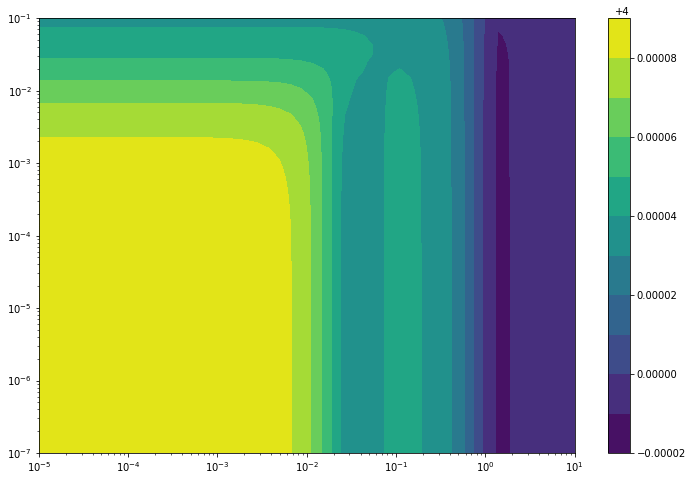

In [156]:
fig, ax = plt.subplots()

alpha_re_list = np.geomspace(1e-5,1e1,num=50)
alpha_im_list = 1e-2*np.geomspace(1e-5,1e1,num=50)

R,I = np.meshgrid(alpha_re_list,alpha_im_list)

cf=ax.contourf(R,I,np.log10(Dabs_lam(R+1j*I)),levels=10)
#cs=ax.contour(R,I,Dabs_lam(R+1j*I),levels=10)

fig.colorbar(cf)

ax.set_xlim(min(alpha_re_list),max(alpha_re_list))
ax.set_ylim(min(alpha_im_list),max(alpha_im_list))
ax.set_yscale('log')
ax.set_xscale('log')

fig.set_size_inches(12,8)

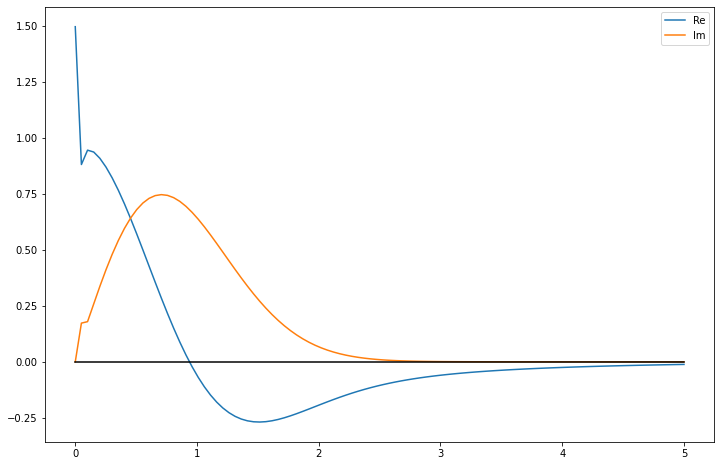

In [117]:
fig, ax = plt.subplots()

alpha_list = np.linspace(0,5,num=100)

im_0=0.01
fig.set_size_inches(12, 8)
ax.plot(alpha_list, Dre(alpha_list+im_0*1j).real,label="Re")
ax.plot(alpha_list, Dim(alpha_list+im_0*1j).real,label="Im")
#ax.plot(alpha_list, Dre(alpha_list.real,alpha_list.im),label="Im")
ax.plot(alpha_list, alpha_list*0,color='k')
plt.legend()
    